In [ ]:
#Problem 1: The Falling Sphere (Data vs. Theory) 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Load the data
data = np.loadtxt('drop_data.csv', delimiter=',', skiprows=1)
time = data[:, 0]
v_exp = data[:, 1]
#(a) the skiprow command is telling the program to ignore the first line of the file. It is needed because it expects numeric data and tying to read the text as a float will cause it to crash. 

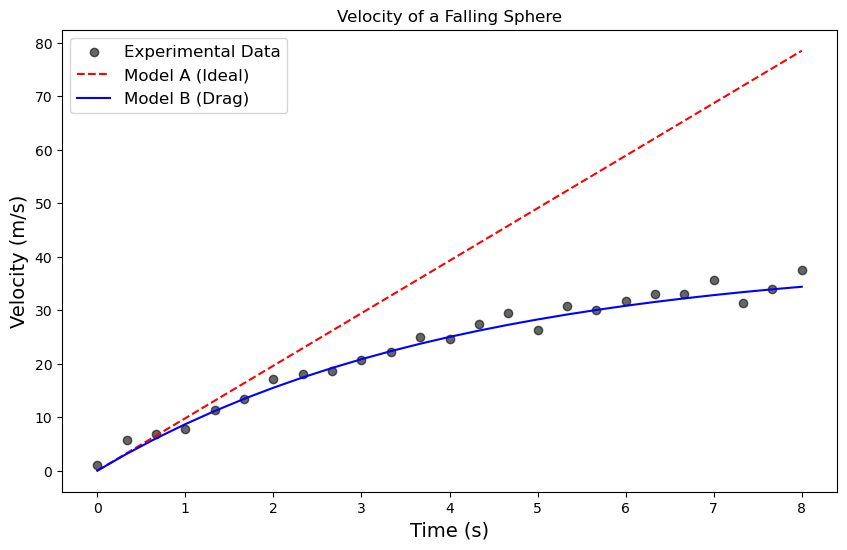

In [11]:
# Define Two Functions
g = 9.81
v_term_init = 40 

def model_a(t):
    """Ideal model: v(t) = g * t"""
    return g * t

def model_b(t, v_term):
    """Drag model: v(t) = v_term * (1 - e^(-gt/v_term))"""
    return v_term * (1 - np.exp(-g * t / v_term))

# plot the velocity of falling sphere 
plt.figure(figsize=(10, 6))
plt.scatter(time, v_exp, color='black', label='Experimental Data', alpha=0.6)
plt.plot(time, model_a(time), 'r--', label='Model A (Ideal)')
plt.plot(time, model_b(time, v_term_init), 'b-', label='Model B (Drag)')

plt.xlabel('Time (s)', fontsize=14) 
plt.ylabel('Velocity (m/s)', fontsize=14) 
plt.legend(fontsize=12) # [cite: 17]
plt.title('Velocity of a Falling Sphere')
plt.show()

In [ ]:
#(b) It stops at around 2-3 seconds. This is because as the sphere speeds up, and the air resistance (drag) increases until it eventually balances the force of gravity, causing the velocity to level off.

In [ ]:
#Problem 2: Parameter Sweeping (Finding the Drag)

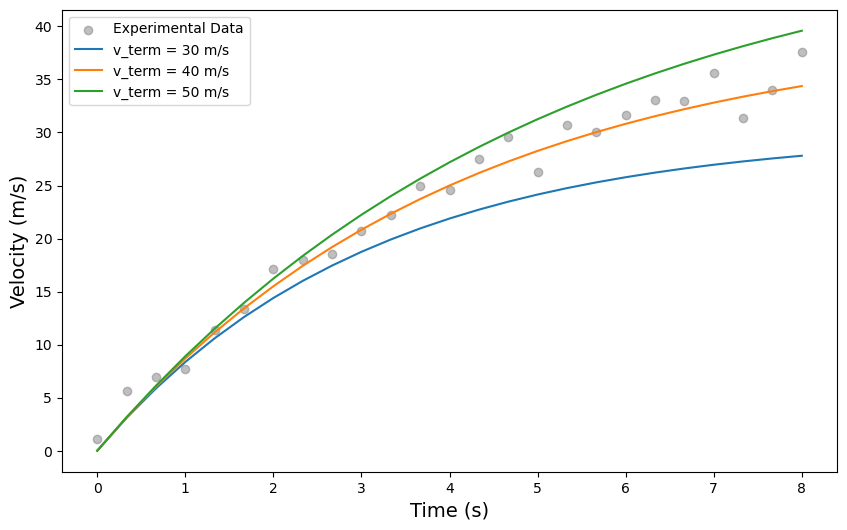

In [12]:
def plot_model_comparison(t_data, v_data, v_term_guesses):
    plt.figure(figsize=(10, 6))
    plt.scatter(t_data, v_data, color='gray', label='Experimental Data', alpha=0.5)
    
    # Loop through guesses
    for v in v_term_guesses:
        plt.plot(t_data, model_b(t_data, v), label=f'v_term = {v} m/s')
        
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Velocity (m/s)', fontsize=14)
    plt.legend()
    plt.show()

# Run for 30, 40, and 50 m/s
plot_model_comparison(time, v_exp, [30, 40, 50])

In [ ]:
# An increasing v makes the curve "taller" and take longer to flatten out. A lower v makes the curve flatten earlier at a lower velocity.

#This should agree with expectations because terminal velocity is determined by the object's mass and surface area. A heavier object would have a higher term.

In [ ]:
#Problem 3: Hooke’s law and estimating fits

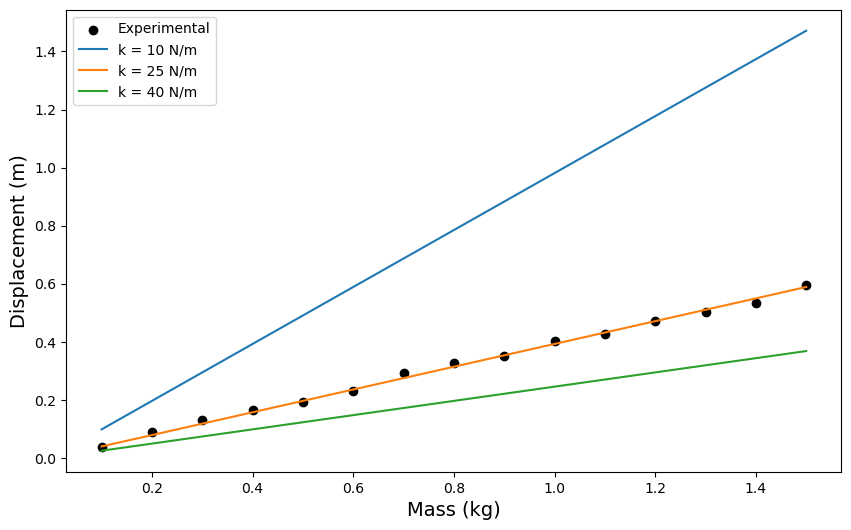

MSE for k=25: 9.053080800122002e-05


In [13]:
#Manual Fit Function 
def spring_model(m, k):
    g = 9.81 
    return (g / k) * m 

# Load spring data 
spring_data = np.loadtxt('spring_data.csv', delimiter=',', skiprows=1)
mass = spring_data[:, 0]
dist_exp = spring_data[:, 1]

# 2. Plotting with multiple k values 
k_vals = [10, 25, 40]
plt.figure(figsize=(10, 6))
plt.scatter(mass, dist_exp, color='black', label='Experimental')
for k in k_vals:
    plt.plot(mass, spring_model(mass, k), label=f'k = {k} N/m')
plt.xlabel('Mass (kg)', fontsize=14)
plt.ylabel('Displacement (m)', fontsize=14)
plt.legend()
plt.show()

#(a) k = 25 N/m creates the line that best follows the trend of the data

# Residuals & MSE 
best_k = 25 
residuals = dist_exp - spring_model(mass, best_k) 
mse = np.mean(residuals**2)
print(f"MSE for k={best_k}: {mse}")

In [14]:
#The slope becomes flatter because k is in the denominator.
#Moving k away from the "best" value will increase the MSE because the model line will be further away from the data points.